<a href="https://www.kaggle.com/code/haddonalexander25/knn-on-iris-data?scriptVersionId=97217719" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


The purposes of this exercise are to practice using a KNN Classification model on the well known Iris dataset. 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

open_file = open("../input/iris-flower-dataset/IRIS.csv")

df = pd.read_csv(open_file)

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Thankfully there are no null values that need to be handled for this data set. This makes this exercise much more straightforward.



In [6]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

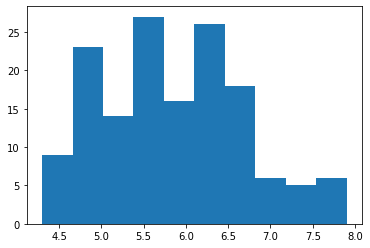

Histogram for sepal_length


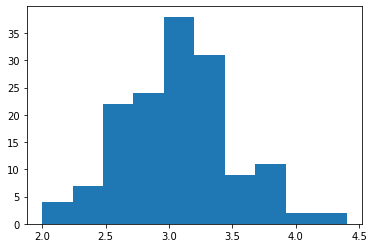

Histogram for sepal_width


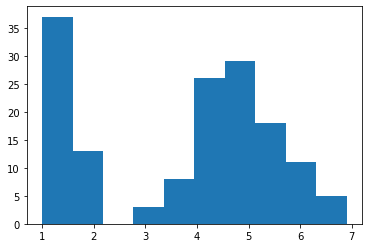

Histogram for petal_length


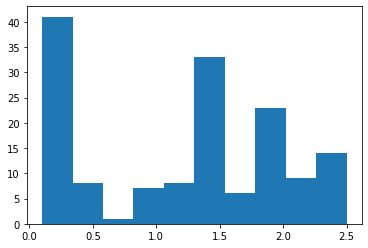

Histogram for petal_width


In [7]:
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for column in columns:
    plt.hist(df[column])
    plt.show()
    print("Histogram for %s" %(column))

Since we are using KNN, we need to normalize the dataset otherwise it will overly favor features with higher ranges thus potentially throwing off the model. I'm going to use the min / max method for this 

In [8]:
df["species"] = df["species"].replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

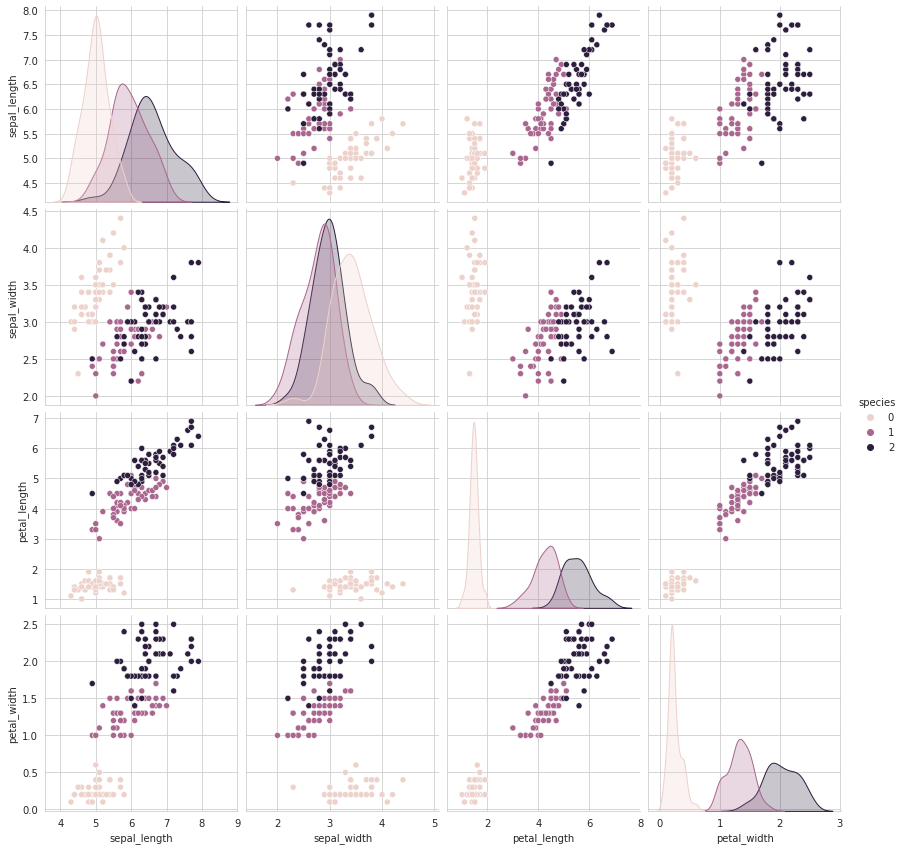

In [9]:
sns.set_style("whitegrid");
sns.pairplot(df, hue= "species", height=3)

In [10]:
for column in columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


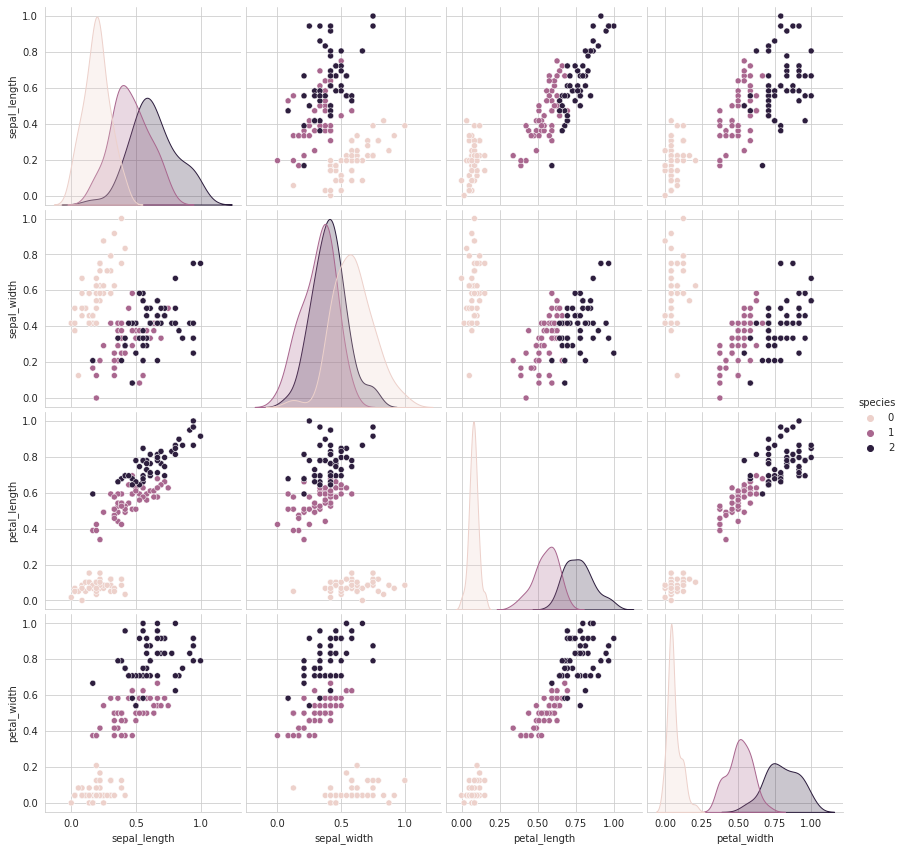

In [12]:
sns.set_style("whitegrid");
sns.pairplot(df, hue= "species", height=3)

Now I need to begin splitting the data into a training set and a testing set. But first I will organize the features and labels to X and y variables. 

In [13]:
y = df["species"]

df = df.drop(columns = ["species"])

X = df

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_model.fit(X_train, y_train)

train_preds = knn_model.predict(X_train)

ps = accuracy_score(train_preds, y_train)

print("Precision score: %s" %(ps))

cm = confusion_matrix(train_preds, y_train)

print("Confusion Matrix: \n %s" %(cm))

cr = classification_report(train_preds, y_train)

print("Classification report: \n %s" %(cr))

Precision score: 0.9666666666666667
Confusion Matrix: 
 [[44  0  0]
 [ 0 38  2]
 [ 0  2 34]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.95      0.95      0.95        40
           2       0.94      0.94      0.94        36

    accuracy                           0.97       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [17]:
test_preds = knn_model.predict(X_test)

ps = accuracy_score(test_preds, y_test)

print("Precision score: %s" %(ps))

cm = confusion_matrix(test_preds, y_test)

print("Confusion Matrix: \n %s" %(cm))

cr = classification_report(test_preds, y_test)

print("Classification report: \n %s" %(cr))

Precision score: 0.9666666666666667
Confusion Matrix: 
 [[ 6  0  0]
 [ 0 10  1]
 [ 0  0 13]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.91      0.95        11
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



I am satisfied with a precision score of .97 for my KNN model. However, it is important to discuss at least in part how the number of nearest neighbors is impacting the model. 

The model is finding the 5 closest neighbors to the point in question, as that is scikit learn's default setting. This is the number of closest other points the model is finding in relation to each individual point for grouping. This number of points can impact the performance of the model. If we wanted to test other values of n_neighbors to see if there is an optimal choice we could run our model through a variety of n_neighbor values. This is also an example of hyperparameter tuning. 

In [18]:
n = []
score = []


for i in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, y_train)
    test_preds = knn_model.predict(X_test)
    ps = accuracy_score(test_preds, y_test)
    n.append(i)
    score.append(ps)
      
df_param = pd.DataFrame({"n_neighbors": n, "precision_score" : score})
df_param

,n_neighbors,precision_score
0,1,0.966667
1,2,0.966667
2,3,0.966667
3,4,0.900000
4,5,0.966667
5,6,0.966667
6,7,0.966667
7,8,0.966667
8,9,0.966667
9,10,0.966667


<function matplotlib.pyplot.show(close=None, block=None)>

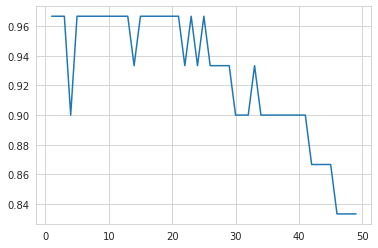

In [19]:
plt.plot(df_param["n_neighbors"], df_param["precision_score"])
plt.show

As you can see from the graph the default for scikit learn KNeighborsClassification was one of the optimal paramaters. Infact, for this data set the number of nearest neighbors could have been multiple values and the model would have still performed the same at .967 accuracy. 